In [2]:
from pyspark import SparkContext, SparkConf
cf = SparkConf()
cf.set("spark.submit.deployMode","client")
sc = SparkContext.getOrCreate(cf)
from pyspark.sql import SparkSession
spark = SparkSession \
	    .builder \
	    .appName("TransitTrends- Taxi") \
	    .config("spark.some.config.option", "some-value") \
	    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/09 00:13:20 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
23/05/09 00:13:20 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
23/05/09 00:13:20 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
23/05/09 00:13:20 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


# Downloading and Loading Data

In [3]:
from pyspark.sql.functions import lit

In [4]:
import os
#from sodapy import Socrata
import pandas as pd
import numpy as np

In [6]:
import subprocess
# downloading fhv cab data(2018-2022) from site https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_20"
output_dir = "/home/yt696_nyu_edu/TAXI/FHV/"
for i in range(18,23):
    for j in range(1, 13):
        url_1 = str(j)
        if j<10:
            url_1 = "0"+url_1
        print("wget "+ url+str(i)+"-"+url_1+".parquet")
        # Run wget command
        subprocess.call(["wget", "-P", output_dir, url+str(i)+"-"+url_1+".parquet"])

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-01.parquet


--2023-05-08 19:18:28--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.126, 18.160.201.131, 18.160.201.5, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180474969 (172M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-01.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.41M 39s
    50K .......... .......... .......... .......... ..........  0% 3.37M 45s
   100K .......... .......... .......... .......... ..........  0% 8.38M 37s
   150K .......... .......... .......... .......... ..........  0% 8.69M 33s
   200K .......... .......... .......... .......... ..........  0% 14.3M 28s
   250K .......... .......... .......... .......... ..........  0% 13.1M 26s
   300K .......... ..

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-02.parquet


200 OK
Length: 174616810 (167M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-02.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.34M 38s
    50K .......... .......... .......... .......... ..........  0% 3.60M 42s
   100K .......... .......... .......... .......... ..........  0% 5.25M 39s
   150K .......... .......... .......... .......... ..........  0% 8.08M 34s
   200K .......... .......... .......... .......... ..........  0% 12.2M 30s
   250K .......... .......... .......... .......... ..........  0% 20.8M 26s
   300K .......... .......... .......... .......... ..........  0% 17.8M 24s
   350K .......... .......... .......... .......... ..........  0% 13.6M 22s
   400K .......... .......... .......... .......... ..........  0% 38.6M 20s
   450K .......... .......... .......... .......... ..........  0% 23.3M 19s
   500K .......... .......... .......... .......... ..........  0% 27.7M 18s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-03.parquet


200 OK
Length: 198108798 (189M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-03.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.57M 74s
    50K .......... .......... .......... .......... ..........  0% 9.79M 46s
   100K .......... .......... .......... .......... ..........  0% 5.76M 42s
   150K .......... .......... .......... .......... ..........  0% 11.3M 36s
   200K .......... .......... .......... .......... ..........  0% 13.6M 31s
   250K .......... .......... .......... .......... ..........  0% 16.8M 28s
   300K .......... .......... .......... .......... ..........  0% 15.9M 26s
   350K .......... .......... .......... .......... ..........  0% 20.7M 24s
   400K .......... .......... .......... .......... ..........  0% 17.7M 22s
   450K .......... .......... .......... .......... ..........  0% 26.6M 21s
   500K .......... .......... .......... .......... ..........  0% 28.1M 19s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-04.parquet


200 OK
Length: 191446020 (183M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-04.parquet’

     0K .......... .......... .......... .......... ..........  0% 5.27M 35s
    50K .......... .......... .......... .......... ..........  0% 3.63M 42s
   100K .......... .......... .......... .......... ..........  0% 5.13M 40s
   150K .......... .......... .......... .......... ..........  0% 9.22M 35s
   200K .......... .......... .......... .......... ..........  0% 14.3M 31s
   250K .......... .......... .......... .......... ..........  0% 17.7M 27s
   300K .......... .......... .......... .......... ..........  0% 15.3M 25s
   350K .......... .......... .......... .......... ..........  0% 22.3M 23s
   400K .......... .......... .......... .......... ..........  0% 27.1M 21s
   450K .......... .......... .......... .......... ..........  0% 24.2M 20s
   500K .......... .......... .......... .......... ..........  0% 18.5M 19s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-05.parquet


200 OK
Length: 196318339 (187M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-05.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.29M 44s
    50K .......... .......... .......... .......... ..........  0% 3.75M 47s
   100K .......... .......... .......... .......... ..........  0% 7.39M 40s
   150K .......... .......... .......... .......... ..........  0% 9.80M 34s
   200K .......... .......... .......... .......... ..........  0% 12.0M 31s
   250K .......... .......... .......... .......... ..........  0% 18.9M 27s
   300K .......... .......... .......... .......... ..........  0% 16.9M 25s
   350K .......... .......... .......... .......... ..........  0% 25.1M 23s
   400K .......... .......... .......... .......... ..........  0% 29.7M 21s
   450K .......... .......... .......... .......... ..........  0% 25.3M 20s
   500K .......... .......... .......... .......... ..........  0% 29.7M 18s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-06.parquet


200 OK
Length: 191936464 (183M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-06.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.71M 68s
    50K .......... .......... .......... .......... ..........  0% 6.46M 48s
   100K .......... .......... .......... .......... ..........  0%  780K 1m52s
   150K .......... .......... .......... .......... ..........  0% 17.4M 87s
   200K .......... .......... .......... .......... ..........  0% 5.47M 76s
   250K .......... .......... .......... .......... ..........  0% 17.4M 65s
   300K .......... .......... .......... .......... ..........  0% 14.3M 58s
   350K .......... .......... .......... .......... ..........  0% 25.9M 51s
   400K .......... .......... .......... .......... ..........  0% 6.85M 48s
   450K .......... .......... .......... .......... ..........  0% 31.2M 44s
   500K .......... .......... .......... .......... ..........  0% 28.7M 41s
   550K ...

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-07.parquet


200 OK
Length: 197385623 (188M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-07.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.77M 68s
    50K .......... .......... .......... .......... ..........  0% 5.01M 53s
   100K .......... .......... .......... .......... ..........  0% 19.3M 38s
   150K .......... .......... .......... .......... ..........  0% 9.51M 34s
   200K .......... .......... .......... .......... ..........  0% 13.5M 30s
   250K .......... .......... .......... .......... ..........  0% 17.1M 27s
   300K .......... .......... .......... .......... ..........  0% 18.3M 24s
   350K .......... .......... .......... .......... ..........  0% 24.2M 22s
   400K .......... .......... .......... .......... ..........  0% 26.2M 21s
   450K .......... .......... .......... .......... ..........  0% 18.1M 20s
   500K .......... .......... .......... .......... ..........  0% 29.0M 18s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-08.parquet


200 OK
Length: 201780696 (192M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-08.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.30M 84s
    50K .......... .......... .......... .......... ..........  0% 9.63M 52s
   100K .......... .......... .......... .......... ..........  0% 5.99M 45s
   150K .......... .......... .......... .......... ..........  0% 11.4M 38s
   200K .......... .......... .......... .......... ..........  0% 11.4M 34s
   250K .......... .......... .......... .......... ..........  0% 21.2M 30s
   300K .......... .......... .......... .......... ..........  0% 12.4M 28s
   350K .......... .......... .......... .......... ..........  0% 20.3M 25s
   400K .......... .......... .......... .......... ..........  0% 25.2M 23s
   450K .......... .......... .......... .......... ..........  0% 26.8M 22s
   500K .......... .......... .......... .......... ..........  0% 29.3M 20s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-09.parquet


200 OK
Length: 201448220 (192M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-09.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.47M 78s
    50K .......... .......... .......... .......... ..........  0% 10.9M 48s
   100K .......... .......... .......... .......... ..........  0% 4.88M 45s
   150K .......... .......... .......... .......... ..........  0% 15.3M 37s
   200K .......... .......... .......... .......... ..........  0% 9.91M 33s
   250K .......... .......... .......... .......... ..........  0% 13.1M 30s
   300K .......... .......... .......... .......... ..........  0% 23.5M 27s
   350K .......... .......... .......... .......... ..........  0% 17.5M 25s
   400K .......... .......... .......... .......... ..........  0% 26.6M 23s
   450K .......... .......... .......... .......... ..........  0% 24.6M 21s
   500K .......... .......... .......... .......... ..........  0% 38.3M 20s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-10.parquet


200 OK
Length: 212541078 (203M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-10.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.46M 45s
    50K .......... .......... .......... .......... ..........  0% 3.66M 50s
   100K .......... .......... .......... .......... ..........  0% 6.17M 45s
   150K .......... .......... .......... .......... ..........  0% 10.4M 38s
   200K .......... .......... .......... .......... ..........  0% 14.8M 33s
   250K .......... .......... .......... .......... ..........  0% 13.5M 30s
   300K .......... .......... .......... .......... ..........  0% 17.0M 28s
   350K .......... .......... .......... .......... ..........  0% 25.8M 25s
   400K .......... .......... .......... .......... ..........  0% 25.9M 23s
   450K .......... .......... .......... .......... ..........  0% 29.3M 22s
   500K .......... .......... .......... .......... ..........  0% 19.7M 21s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-11.parquet


200 OK
Length: 208557336 (199M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-11.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.72M 73s
    50K .......... .......... .......... .......... ..........  0% 10.7M 46s
   100K .......... .......... .......... .......... ..........  0% 5.43M 43s
   150K .......... .......... .......... .......... ..........  0% 13.2M 36s
   200K .......... .......... .......... .......... ..........  0% 15.2M 31s
   250K .......... .......... .......... .......... ..........  0% 18.0M 28s
   300K .......... .......... .......... .......... ..........  0% 14.6M 26s
   350K .......... .......... .......... .......... ..........  0% 22.9M 24s
   400K .......... .......... .......... .......... ..........  0% 29.9M 22s
   450K .......... .......... .......... .......... ..........  0% 26.1M 20s
   500K .......... .......... .......... .......... ..........  0% 33.3M 19s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2018-12.parquet


200 OK
Length: 216961802 (207M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2018-12.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.52M 46s
    50K .......... .......... .......... .......... ..........  0% 3.18M 55s
   100K .......... .......... .......... .......... ..........  0% 8.60M 45s
   150K .......... .......... .......... .......... ..........  0% 7.25M 41s
   200K .......... .......... .......... .......... ..........  0% 14.7M 35s
   250K .......... .......... .......... .......... ..........  0% 21.6M 31s
   300K .......... .......... .......... .......... ..........  0% 18.6M 28s
   350K .......... .......... .......... .......... ..........  0% 20.4M 26s
   400K .......... .......... .......... .......... ..........  0% 24.8M 24s
   450K .......... .......... .......... .......... ..........  0% 32.9M 22s
   500K .......... .......... .......... .......... ..........  0% 30.0M 21s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-01.parquet


200 OK
Length: 210707424 (201M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-01.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.25M 47s
    50K .......... .......... .......... .......... ..........  0% 3.28M 54s
   100K .......... .......... .......... .......... ..........  0% 5.84M 48s
   150K .......... .......... .......... .......... ..........  0% 9.94M 41s
   200K .......... .......... .......... .......... ..........  0% 13.8M 35s
   250K .......... .......... .......... .......... ..........  0% 14.2M 32s
   300K .......... .......... .......... .......... ..........  0% 16.3M 29s
   350K .......... .......... .......... .......... ..........  0% 23.8M 27s
   400K .......... .......... .......... .......... ..........  0% 20.0M 25s
   450K .......... .......... .......... .......... ..........  0% 25.3M 23s
   500K .......... .......... .......... .......... ..........  0% 20.2M 22s
   550K .....

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-02.parquet


200 OK
Length: 15282636 (15M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-02.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.72M 3s
    50K .......... .......... .......... .......... ..........  0% 3.57M 4s
   100K .......... .......... .......... .......... ..........  1% 6.06M 3s
   150K .......... .......... .......... .......... ..........  1% 10.5M 3s
   200K .......... .......... .......... .......... ..........  1% 13.7M 2s
   250K .......... .......... .......... .......... ..........  2% 21.0M 2s
   300K .......... .......... .......... .......... ..........  2% 18.2M 2s
   350K .......... .......... .......... .......... ..........  2% 16.8M 2s
   400K .......... .......... .......... .......... ..........  3% 25.2M 2s
   450K .......... .......... .......... .......... ..........  3% 26.9M 1s
   500K .......... .......... .......... .......... ..........  3% 21.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-03.parquet


HTTP request sent, awaiting response... 200 OK
Length: 13576299 (13M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-03.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.55M 5s
    50K .......... .......... .......... .......... ..........  0% 8.03M 3s
   100K .......... .......... .......... .......... ..........  1% 5.43M 3s
   150K .......... .......... .......... .......... ..........  1% 14.1M 2s
   200K .......... .......... .......... .......... ..........  1% 11.2M 2s
   250K .......... .......... .......... .......... ..........  2% 20.9M 2s
   300K .......... .......... .......... .......... ..........  2% 15.9M 2s
   350K .......... .......... .......... .......... ..........  3% 25.3M 2s
   400K .......... .......... .......... .......... ..........  3% 26.4M 1s
   450K .......... .......... .......... .......... ..........  3% 20.0M 1s
   500K .......... .......... .......... .......... ..........  4% 46.2M 1s


wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-04.parquet


200 OK
Length: 17074503 (16M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-04.parquet’

     0K .......... .......... .......... .......... ..........  0% 5.18M 3s
    50K .......... .......... .......... .......... ..........  0% 3.79M 4s
   100K .......... .......... .......... .......... ..........  0% 7.27M 3s
   150K .......... .......... .......... .......... ..........  1% 9.35M 3s
   200K .......... .......... .......... .......... ..........  1% 10.7M 3s
   250K .......... .......... .......... .......... ..........  1% 24.1M 2s
   300K .......... .......... .......... .......... ..........  2% 21.8M 2s
   350K .......... .......... .......... .......... ..........  2% 26.6M 2s
   400K .......... .......... .......... .......... ..........  2% 19.8M 2s
   450K .......... .......... .......... .......... ..........  2% 20.7M 2s
   500K .......... .......... .......... .......... ..........  3% 45.6M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-05.parquet


200 OK
Length: 18204679 (17M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-05.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.50M 7s
    50K .......... .......... .......... .......... ..........  0% 9.56M 4s
   100K .......... .......... .......... .......... ..........  0% 8.32M 4s
   150K .......... .......... .......... .......... ..........  1% 9.66M 3s
   200K .......... .......... .......... .......... ..........  1% 12.4M 3s
   250K .......... .......... .......... .......... ..........  1% 17.9M 2s
   300K .......... .......... .......... .......... ..........  1% 23.5M 2s
   350K .......... .......... .......... .......... ..........  2% 18.5M 2s
   400K .......... .......... .......... .......... ..........  2% 26.6M 2s
   450K .......... .......... .......... .......... ..........  2% 29.1M 2s
   500K .......... .......... .......... .......... ..........  3% 21.8M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-06.parquet


200 OK
Length: 17769396 (17M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-06.parquet’

     0K .......... .......... .......... .......... ..........  0% 3.88M 4s
    50K .......... .......... .......... .......... ..........  0% 3.96M 4s
   100K .......... .......... .......... .......... ..........  0% 5.15M 4s
   150K .......... .......... .......... .......... ..........  1% 10.3M 3s
   200K .......... .......... .......... .......... ..........  1% 12.3M 3s
   250K .......... .......... .......... .......... ..........  1% 14.1M 3s
   300K .......... .......... .......... .......... ..........  2% 26.1M 2s
   350K .......... .......... .......... .......... ..........  2% 21.7M 2s
   400K .......... .......... .......... .......... ..........  2% 22.0M 2s
   450K .......... .......... .......... .......... ..........  2% 18.7M 2s
   500K .......... .......... .......... .......... ..........  3% 26.8M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-07.parquet


HTTP request sent, awaiting response... 200 OK
Length: 17313821 (17M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-07.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.87M 3s
    50K .......... .......... .......... .......... ..........  0% 3.55M 4s
   100K .......... .......... .......... .......... ..........  0% 6.61M 3s
   150K .......... .......... .......... .......... ..........  1% 10.9M 3s
   200K .......... .......... .......... .......... ..........  1% 13.7M 3s
   250K .......... .......... .......... .......... ..........  1% 16.1M 2s
   300K .......... .......... .......... .......... ..........  2% 17.8M 2s
   350K .......... .......... .......... .......... ..........  2% 21.2M 2s
   400K .......... .......... .......... .......... ..........  2% 17.2M 2s
   450K .......... .......... .......... .......... ..........  2% 27.6M 2s
   500K .......... .......... .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-08.parquet


200 OK
Length: 17309069 (17M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-08.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.62M 6s
    50K .......... .......... .......... .......... ..........  0% 4.86M 5s
   100K .......... .......... .......... .......... ..........  0% 7.13M 4s
   150K .......... .......... .......... .......... ..........  1% 13.7M 3s
   200K .......... .......... .......... .......... ..........  1% 13.8M 3s
   250K .......... .......... .......... .......... ..........  1% 13.2M 3s
   300K .......... .......... .......... .......... ..........  2% 18.3M 2s
   350K .......... .......... .......... .......... ..........  2% 17.5M 2s
   400K .......... .......... .......... .......... ..........  2% 23.3M 2s
   450K .......... .......... .......... .......... ..........  2% 38.7M 2s
   500K .......... .......... .......... .......... ..........  3% 29.6M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-09.parquet


HTTP request sent, awaiting response... 200 OK
Length: 12256014 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-09.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.40M 5s
    50K .......... .......... .......... .......... ..........  0% 4.73M 4s
   100K .......... .......... .......... .......... ..........  1% 11.4M 3s
   150K .......... .......... .......... .......... ..........  1% 6.25M 3s
   200K .......... .......... .......... .......... ..........  2% 15.7M 2s
   250K .......... .......... .......... .......... ..........  2% 15.0M 2s
   300K .......... .......... .......... .......... ..........  2% 20.7M 2s
   350K .......... .......... .......... .......... ..........  3% 19.1M 2s
   400K .......... .......... .......... .......... ..........  3% 29.6M 1s
   450K .......... .......... .......... .......... ..........  4% 23.8M 1s
   500K .......... .......... .......... .......... ..........  4% 22.8M 1s


wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-10.parquet


200 OK
Length: 18344035 (17M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-10.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.74M 6s
    50K .......... .......... .......... .......... ..........  0% 4.11M 5s
   100K .......... .......... .......... .......... ..........  0% 18.5M 4s
   150K .......... .......... .......... .......... ..........  1% 11.9M 3s
   200K .......... .......... .......... .......... ..........  1% 13.9M 3s
   250K .......... .......... .......... .......... ..........  1% 19.8M 2s
   300K .......... .......... .......... .......... ..........  1% 18.1M 2s
   350K .......... .......... .......... .......... ..........  2% 18.8M 2s
   400K .......... .......... .......... .......... ..........  2% 27.2M 2s
   450K .......... .......... .......... .......... ..........  2% 19.5M 2s
   500K .......... .......... .......... .......... ..........  3% 47.5M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-11.parquet


200 OK
Length: 18162486 (17M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-11.parquet’

     0K .......... .......... .......... .......... ..........  0% 3.95M 4s
    50K .......... .......... .......... .......... ..........  0% 4.82M 4s
   100K .......... .......... .......... .......... ..........  0% 5.89M 4s
   150K .......... .......... .......... .......... ..........  1% 12.7M 3s
   200K .......... .......... .......... .......... ..........  1% 19.0M 3s
   250K .......... .......... .......... .......... ..........  1% 14.7M 2s
   300K .......... .......... .......... .......... ..........  1% 15.7M 2s
   350K .......... .......... .......... .......... ..........  2% 26.6M 2s
   400K .......... .......... .......... .......... ..........  2% 25.3M 2s
   450K .......... .......... .......... .......... ..........  2% 31.1M 2s
   500K .......... .......... .......... .......... ..........  3% 22.6M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-12.parquet


200 OK
Length: 19638634 (19M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2019-12.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.99M 4s
    50K .......... .......... .......... .......... ..........  0% 3.70M 4s
   100K .......... .......... .......... .......... ..........  0% 6.18M 4s
   150K .......... .......... .......... .......... ..........  1% 11.1M 3s
   200K .......... .......... .......... .......... ..........  1% 14.0M 3s
   250K .......... .......... .......... .......... ..........  1% 16.7M 3s
   300K .......... .......... .......... .......... ..........  1% 15.8M 2s
   350K .......... .......... .......... .......... ..........  2% 24.0M 2s
   400K .......... .......... .......... .......... ..........  2% 26.0M 2s
   450K .......... .......... .......... .......... ..........  2% 19.0M 2s
   500K .......... .......... .......... .......... ..........  2% 31.7M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-01.parquet


200 OK
Length: 19492091 (19M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-01.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.15M 4s
    50K .......... .......... .......... .......... ..........  0% 3.49M 5s
   100K .......... .......... .......... .......... ..........  0% 5.26M 4s
   150K .......... .......... .......... .......... ..........  1% 10.0M 4s
   200K .......... .......... .......... .......... ..........  1% 11.7M 3s
   250K .......... .......... .......... .......... ..........  1% 16.7M 3s
   300K .......... .......... .......... .......... ..........  1% 15.6M 3s
   350K .......... .......... .......... .......... ..........  2% 23.9M 2s
   400K .......... .......... .......... .......... ..........  2% 22.2M 2s
   450K .......... .......... .......... .......... ..........  2% 29.6M 2s
   500K .......... .......... .......... .......... ..........  2% 25.5M 2s
   550K .......... .......

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-02.parquet


--2023-05-08 19:19:31--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18463458 (18M) [application/x-www-form-urlencoded]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-02.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.43M 4s
    50K .......... .......... .......... .......... ..........  0% 3.68M 4s
   100K .......... .......... .......... .......... ..........  0% 6.38M 4s
   150K .......... .......... .......... .......... ..........  1% 8.36M 3s
   200K .......... .......... .......... .......... ..........  1% 20.4M 3s
   250K .......... .......... .......... .......... ..........  1% 11.7M 3s
   300K .......... .........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-03.parquet


connected.
HTTP request sent, awaiting response... 200 OK
Length: 14325187 (14M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-03.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.67M 5s
    50K .......... .......... .......... .......... ..........  0% 5.29M 4s
   100K .......... .......... .......... .......... ..........  1%  573K 11s
   150K .......... .......... .......... .......... ..........  1% 18.8M 8s
   200K .......... .......... .......... .......... ..........  1% 6.62M 7s
   250K .......... .......... .......... .......... ..........  2% 25.3M 6s
   300K .......... .......... .......... .......... ..........  2% 16.8M 5s
   350K .......... .......... .......... .......... ..........  2% 20.7M 4s
   400K .......... .......... .......... .......... ..........  3% 16.2M 4s
   450K .......... .......... .......... .......... ..........  3% 24.4M 4s
   500K .......... .......... .......... .......... ..........  

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-04.parquet


200 OK
Length: 6487973 (6.2M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-04.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.41M 3s
    50K .......... .......... .......... .......... ..........  1% 11.0M 2s
   100K .......... .......... .......... .......... ..........  2% 6.14M 1s
   150K .......... .......... .......... .......... ..........  3% 5.49M 1s
   200K .......... .......... .......... .......... ..........  3% 14.9M 1s
   250K .......... .......... .......... .......... ..........  4% 23.6M 1s
   300K .......... .......... .......... .......... ..........  5% 18.8M 1s
   350K .......... .......... .......... .......... ..........  6% 21.2M 1s
   400K .......... .......... .......... .......... ..........  7% 14.9M 1s
   450K .......... .......... .......... .......... ..........  7% 45.3M 1s
   500K .......... .......... .......... .......... ..........  8% 19.5M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-05.parquet


--2023-05-08 19:19:33--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-05.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8462643 (8.1M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-05.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.28M 2s
    50K .......... .......... .......... .......... ..........  1% 3.32M 2s
   100K .......... .......... .......... .......... ..........  1% 6.60M 2s
   150K .......... .......... .......... .......... ..........  2% 11.2M 2s
   200K .......... .......... .......... .......... ..........  3% 13.0M 1s
   250K .......... .......... .......... .......... ..........  3% 13.3M 1s
   300K .......... .......... .......... .

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-06.parquet


200 OK
Length: 10657161 (10M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-06.parquet’

     0K .......... .......... .......... .......... ..........  0% 6.79M 1s
    50K .......... .......... .......... .......... ..........  0% 3.81M 2s
   100K .......... .......... .......... .......... ..........  1% 6.22M 2s
   150K .......... .......... .......... .......... ..........  1% 11.0M 2s
   200K .......... .......... .......... .......... ..........  2% 10.1M 2s
   250K .......... .......... .......... .......... ..........  2% 29.3M 1s
   300K .......... .......... .......... .......... ..........  3% 15.1M 1s
   350K .......... .......... .......... .......... ..........  3% 34.5M 1s
   400K .......... .......... .......... .......... ..........  4% 19.4M 1s
   450K .......... .......... .......... .......... ..........  4% 29.0M 1s
   500K .......... .......... .......... .......... ..........  5% 21.4M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-07.parquet


200 OK
Length: 11741599 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-07.parquet’

     0K .......... .......... .......... .......... ..........  0% 3.81M 3s
    50K .......... .......... .......... .......... ..........  0% 4.37M 3s
   100K .......... .......... .......... .......... ..........  1% 7.23M 2s
   150K .......... .......... .......... .......... ..........  1% 9.52M 2s
   200K .......... .......... .......... .......... ..........  2% 14.7M 2s
   250K .......... .......... .......... .......... ..........  2% 16.7M 2s
   300K .......... .......... .......... .......... ..........  3% 19.5M 1s
   350K .......... .......... .......... .......... ..........  3% 20.8M 1s
   400K .......... .......... .......... .......... ..........  3% 16.8M 1s
   450K .......... .......... .......... .......... ..........  4% 29.8M 1s
   500K .......... .......... .......... .......... ..........  4% 25.9M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-08.parquet


200 OK
Length: 12333513 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-08.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.83M 2s
    50K .......... .......... .......... .......... ..........  0% 3.83M 3s
   100K .......... .......... .......... .......... ..........  1% 7.24M 2s
   150K .......... .......... .......... .......... ..........  1% 9.62M 2s
   200K .......... .......... .......... .......... ..........  2% 12.0M 2s
   250K .......... .......... .......... .......... ..........  2% 18.2M 2s
   300K .......... .......... .......... .......... ..........  2% 18.4M 1s
   350K .......... .......... .......... .......... ..........  3% 30.2M 1s
   400K .......... .......... .......... .......... ..........  3% 19.0M 1s
   450K .......... .......... .......... .......... ..........  4% 31.6M 1s
   500K .......... .......... .......... .......... ..........  4% 24.9M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-09.parquet


200 OK
Length: 12994527 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-09.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.77M 4s
    50K .......... .......... .......... .......... ..........  0% 4.15M 4s
   100K .......... .......... .......... .......... ..........  1% 16.7M 3s
   150K .......... .......... .......... .......... ..........  1% 11.1M 2s
   200K .......... .......... .......... .......... ..........  1% 14.5M 2s
   250K .......... .......... .......... .......... ..........  2% 15.7M 2s
   300K .......... .......... .......... .......... ..........  2% 26.7M 2s
   350K .......... .......... .......... .......... ..........  3% 23.0M 1s
   400K .......... .......... .......... .......... ..........  3% 18.5M 1s
   450K .......... .......... .......... .......... ..........  3% 25.5M 1s
   500K .......... .......... .......... .......... ..........  4% 29.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-10.parquet


200 OK
Length: 12814343 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-10.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.50M 3s
    50K .......... .......... .......... .......... ..........  0% 3.67M 3s
   100K .......... .......... .......... .......... ..........  1% 5.62M 3s
   150K .......... .......... .......... .......... ..........  1% 9.57M 2s
   200K .......... .......... .......... .......... ..........  1% 11.6M 2s
   250K .......... .......... .......... .......... ..........  2% 16.8M 2s
   300K .......... .......... .......... .......... ..........  2% 21.3M 2s
   350K .......... .......... .......... .......... ..........  3% 22.8M 1s
   400K .......... .......... .......... .......... ..........  3% 16.7M 1s
   450K .......... .......... .......... .......... ..........  3% 28.4M 1s
   500K .......... .......... .......... .......... ..........  4% 27.6M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-11.parquet


--2023-05-08 19:19:36--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-11.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12335235 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-11.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.32M 3s
    50K .......... .......... .......... .......... ..........  0% 3.49M 3s
   100K .......... .......... .......... .......... ..........  1% 5.29M 3s
   150K .......... .......... .......... .......... ..........  1% 11.7M 2s
   200K .......... .......... .......... .......... ..........  2% 12.6M 2s
   250K .......... .......... .......... .......... ..........  2% 16.5M 2s
   300K .......... .......... .......... .

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-12.parquet


200 OK
Length: 12027645 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2020-12.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.39M 5s
    50K .......... .......... .......... .......... ..........  0% 5.10M 3s
   100K .......... .......... .......... .......... ..........  1% 8.94M 3s
   150K .......... .......... .......... .......... ..........  1% 11.5M 2s
   200K .......... .......... .......... .......... ..........  2% 15.7M 2s
   250K .......... .......... .......... .......... ..........  2% 19.7M 2s
   300K .......... .......... .......... .......... ..........  2% 16.5M 2s
   350K .......... .......... .......... .......... ..........  3% 26.6M 1s
   400K .......... .......... .......... .......... ..........  3% 21.9M 1s
   450K .......... .......... .......... .......... ..........  4% 29.2M 1s
   500K .......... .......... .......... .......... ..........  4% 27.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet


--2023-05-08 19:19:37--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-01.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.79M 2s
    50K .......... .......... .......... .......... ..........  0% 5.67M 2s
   100K .......... .......... .......... .......... ..........  1% 14.3M 2s
   150K .......... .......... .......... .......... ..........  1% 9.37M 2s
   200K .......... .......... .......... .......... ..........  2% 15.5M 1s
   250K .......... .......... .......... .......... ..........  2% 15.2M 1s
   300K .......... .......... .......... .

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-02.parquet


HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-02.parquet’

     0K .......... .......... .......... .......... ..........  0% 5.69M 2s
    50K .......... .......... .......... .......... ..........  0% 4.90M 2s
   100K .......... .......... .......... .......... ..........  1% 14.1M 2s
   150K .......... .......... .......... .......... ..........  1% 9.62M 1s
   200K .......... .......... .......... .......... ..........  2% 15.3M 1s
   250K .......... .......... .......... .......... ..........  2% 13.3M 1s
   300K .......... .......... .......... .......... ..........  3% 21.7M 1s
   350K .......... .......... .......... .......... ..........  3% 20.9M 1s
   400K .......... .......... .......... .......... ..........  4% 40.8M 1s
   450K .......... .......... .......... .......... ..........  4% 46.5M 1s
   500K .......... .......... .......... .......... ..........  5% 28.2M 1s


wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-03.parquet


Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13167110 (13M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-03.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.65M 5s
    50K .......... .......... .......... .......... ..........  0% 9.47M 3s
   100K .......... .......... .......... .......... ..........  1% 9.29M 2s
   150K .......... .......... .......... .......... ..........  1% 9.28M 2s
   200K .......... .......... .......... .......... ..........  1% 11.9M 2s
   250K .......... .......... .......... .......... ..........  2% 20.3M 2s
   300K .......... .......... .......... .......... ..........  2% 24.5M 2s
   350K .......... .......... .......... .......... ..........  3% 1

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-04.parquet


Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12857489 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-04.parquet’

     0K .......... .......... .......... .......... ..........  0%  170M 0s
    50K .......... .......... .......... .......... ..........  0% 4.83M 1s
   100K .......... .......... .......... .......... ..........  1% 12.0M 1s
   150K .......... .......... .......... .......... ..........  1% 5.15M 1s
   200K .......... .......... .......... .......... ..........  1% 13.6M 1s
   250K .......... .......... .......... .......... ..........  2% 16.1M 1s
   300K .......... .......... .......... .......... ..........  2% 13.3M 1s
   350K .......... .......... .......... .......... ..........  3% 1

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-05.parquet


200 OK
Length: 12830270 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-05.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.51M 3s
    50K .......... .......... .......... .......... ..........  0% 3.24M 3s
   100K .......... .......... .......... .......... ..........  1% 6.97M 3s
   150K .......... .......... .......... .......... ..........  1% 7.37M 2s
   200K .......... .......... .......... .......... ..........  1% 16.3M 2s
   250K .......... .......... .......... .......... ..........  2% 19.0M 2s
   300K .......... .......... .......... .......... ..........  2% 21.3M 2s
   350K .......... .......... .......... .......... ..........  3% 18.8M 2s
   400K .......... .......... .......... .......... ..........  3% 17.8M 1s
   450K .......... .......... .......... .......... ..........  3% 28.1M 1s
   500K .......... .......... .......... .......... ..........  4% 25.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-06.parquet


200 OK
Length: 13208079 (13M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-06.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.77M 5s
    50K .......... .......... .......... .......... ..........  0% 10.1M 3s
   100K .......... .......... .......... .......... ..........  1% 5.43M 3s
   150K .......... .......... .......... .......... ..........  1% 10.4M 2s
   200K .......... .......... .......... .......... ..........  1% 18.5M 2s
   250K .......... .......... .......... .......... ..........  2% 23.4M 2s
   300K .......... .......... .......... .......... ..........  2% 18.5M 2s
   350K .......... .......... .......... .......... ..........  3% 17.2M 1s
   400K .......... .......... .......... .......... ..........  3% 28.5M 1s
   450K .......... .......... .......... .......... ..........  3% 30.8M 1s
   500K .......... .......... .......... .......... ..........  4% 31.2M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-07.parquet


200 OK
Length: 12650862 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-07.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.41M 3s
    50K .......... .......... .......... .......... ..........  0% 4.17M 3s
   100K .......... .......... .......... .......... ..........  1% 6.06M 3s
   150K .......... .......... .......... .......... ..........  1% 16.8M 2s
   200K .......... .......... .......... .......... ..........  2% 12.5M 2s
   250K .......... .......... .......... .......... ..........  2% 10.1M 2s
   300K .......... .......... .......... .......... ..........  2% 25.4M 2s
   350K .......... .......... .......... .......... ..........  3% 24.8M 1s
   400K .......... .......... .......... .......... ..........  3% 18.1M 1s
   450K .......... .......... .......... .......... ..........  4% 23.8M 1s
   500K .......... .......... .......... .......... ..........  4% 47.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-08.parquet


--2023-05-08 19:19:41--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-08.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12249792 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-08.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.36M 5s
    50K .......... .......... .......... .......... ..........  0% 9.36M 3s
   100K .......... .......... .......... .......... ..........  1% 9.90M 2s
   150K .......... .......... .......... .......... ..........  1% 8.35M 2s
   200K .......... .......... .......... .......... ..........  2% 14.5M 2s
   250K .......... .......... .......... .......... ..........  2% 13.0M 2s
   300K .......... .......... .......... .

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-09.parquet


200 OK
Length: 12019173 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-09.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.87M 4s
    50K .......... .......... .......... .......... ..........  0% 10.3M 3s
   100K .......... .......... .......... .......... ..........  1% 5.34M 2s
   150K .......... .......... .......... .......... ..........  1% 13.3M 2s
   200K .......... .......... .......... .......... ..........  2% 16.0M 2s
   250K .......... .......... .......... .......... ..........  2% 18.6M 2s
   300K .......... .......... .......... .......... ..........  2% 18.8M 1s
   350K .......... .......... .......... .......... ..........  3% 18.1M 1s
   400K .......... .......... .......... .......... ..........  3% 44.0M 1s
   450K .......... .......... .......... .......... ..........  4% 19.7M 1s
   500K .......... .......... .......... .......... ..........  4% 41.2M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-10.parquet


200 OK
Length: 12875974 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-10.parquet’

     0K .......... .......... .......... .......... ..........  0% 5.16M 2s
    50K .......... .......... .......... .......... ..........  0% 3.45M 3s
   100K .......... .......... .......... .......... ..........  1% 7.10M 3s
   150K .......... .......... .......... .......... ..........  1% 8.14M 2s
   200K .......... .......... .......... .......... ..........  1% 14.9M 2s
   250K .......... .......... .......... .......... ..........  2% 17.5M 2s
   300K .......... .......... .......... .......... ..........  2% 18.1M 2s
   350K .......... .......... .......... .......... ..........  3% 24.0M 1s
   400K .......... .......... .......... .......... ..........  3% 14.3M 1s
   450K .......... .......... .......... .......... ..........  3% 45.5M 1s
   500K .......... .......... .......... .......... ..........  4% 21.2M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-11.parquet


200 OK
Length: 12368097 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-11.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.39M 3s
    50K .......... .......... .......... .......... ..........  0% 3.89M 3s
   100K .......... .......... .......... .......... ..........  1% 7.09M 2s
   150K .......... .......... .......... .......... ..........  1% 9.65M 2s
   200K .......... .......... .......... .......... ..........  2% 13.3M 2s
   250K .......... .......... .......... .......... ..........  2% 19.4M 2s
   300K .......... .......... .......... .......... ..........  2% 18.7M 1s
   350K .......... .......... .......... .......... ..........  3% 24.8M 1s
   400K .......... .......... .......... .......... ..........  3% 19.4M 1s
   450K .......... .......... .......... .......... ..........  4% 31.6M 1s
   500K .......... .......... .......... .......... ..........  4% 22.6M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-12.parquet


200 OK
Length: 13590300 (13M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2021-12.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.30M 6s
    50K .......... .......... .......... .......... ..........  0% 9.75M 3s
   100K .......... .......... .......... .......... ..........  1% 10.4M 3s
   150K .......... .......... .......... .......... ..........  1% 9.30M 2s
   200K .......... .......... .......... .......... ..........  1% 11.1M 2s
   250K .......... .......... .......... .......... ..........  2% 16.3M 2s
   300K .......... .......... .......... .......... ..........  2% 26.1M 2s
   350K .......... .......... .......... .......... ..........  3% 27.5M 2s
   400K .......... .......... .......... .......... ..........  3% 29.4M 1s
   450K .......... .......... .......... .......... ..........  3% 23.9M 1s
   500K .......... .......... .......... .......... ..........  4% 34.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-01.parquet


200 OK
Length: 11663225 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-01.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.90M 2s
    50K .......... .......... .......... .......... ..........  0% 3.40M 3s
   100K .......... .......... .......... .......... ..........  1% 6.26M 2s
   150K .......... .......... .......... .......... ..........  1% 9.14M 2s
   200K .......... .......... .......... .......... ..........  2% 11.8M 2s
   250K .......... .......... .......... .......... ..........  2% 18.3M 2s
   300K .......... .......... .......... .......... ..........  3% 17.3M 1s
   350K .......... .......... .......... .......... ..........  3% 23.5M 1s
   400K .......... .......... .......... .......... ..........  3% 25.4M 1s
   450K .......... .......... .......... .......... ..........  4% 23.9M 1s
   500K .......... .......... .......... .......... ..........  4% 35.1M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-02.parquet


200 OK
Length: 12497217 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-02.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.57M 5s
    50K .......... .......... .......... .......... ..........  0% 10.6M 3s
   100K .......... .......... .......... .......... ..........  1% 7.06M 2s
   150K .......... .......... .......... .......... ..........  1% 9.17M 2s
   200K .......... .......... .......... .......... ..........  2% 11.1M 2s
   250K .......... .......... .......... .......... ..........  2% 27.8M 2s
   300K .......... .......... .......... .......... ..........  2% 18.0M 2s
   350K .......... .......... .......... .......... ..........  3% 17.7M 1s
   400K .......... .......... .......... .......... ..........  3% 25.1M 1s
   450K .......... .......... .......... .......... ..........  4% 27.4M 1s
   500K .......... .......... .......... .......... ..........  4% 22.3M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-03.parquet


200 OK
Length: 13748459 (13M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-03.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.79M 5s
    50K .......... .......... .......... .......... ..........  0% 4.81M 4s
   100K .......... .......... .......... .......... ..........  1% 12.6M 3s
   150K .......... .......... .......... .......... ..........  1% 13.3M 2s
   200K .......... .......... .......... .......... ..........  1% 18.2M 2s
   250K .......... .......... .......... .......... ..........  2% 14.0M 2s
   300K .......... .......... .......... .......... ..........  2% 22.9M 2s
   350K .......... .......... .......... .......... ..........  2% 16.5M 2s
   400K .......... .......... .......... .......... ..........  3% 25.8M 1s
   450K .......... .......... .......... .......... ..........  3% 31.7M 1s
   500K .......... .......... .......... .......... ..........  4% 37.9M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-04.parquet


200 OK
Length: 12766827 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-04.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.27M 3s
    50K .......... .......... .......... .......... ..........  0% 4.42M 3s
   100K .......... .......... .......... .......... ..........  1% 11.1M 2s
   150K .......... .......... .......... .......... ..........  1% 7.52M 2s
   200K .......... .......... .......... .......... ..........  2% 11.6M 2s
   250K .......... .......... .......... .......... ..........  2% 15.7M 2s
   300K .......... .......... .......... .......... ..........  2% 17.0M 2s
   350K .......... .......... .......... .......... ..........  3% 33.3M 1s
   400K .......... .......... .......... .......... ..........  3% 22.5M 1s
   450K .......... .......... .......... .......... ..........  4% 50.4M 1s
   500K .......... .......... .......... .......... ..........  4% 23.0M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-05.parquet


Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12667396 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-05.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.72M 4s
    50K .......... .......... .......... .......... ..........  0% 5.04M 3s
   100K .......... .......... .......... .......... ..........  1% 11.9M 3s
   150K .......... .......... .......... .......... ..........  1% 14.4M 2s
   200K .......... .......... .......... .......... ..........  2% 15.2M 2s
   250K .......... .......... .......... .......... ..........  2% 19.1M 2s
   300K .......... .......... .......... .......... ..........  2% 24.8M 1s
   350K .......... .......... .......... .......... ..........  3% 1

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-06.parquet


200 OK
Length: 12241461 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-06.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.73M 4s
    50K .......... .......... .......... .......... ..........  0% 10.1M 3s
   100K .......... .......... .......... .......... ..........  1% 5.75M 2s
   150K .......... .......... .......... .......... ..........  1% 14.1M 2s
   200K .......... .......... .......... .......... ..........  2% 14.0M 2s
   250K .......... .......... .......... .......... ..........  2% 18.8M 2s
   300K .......... .......... .......... .......... ..........  2% 20.8M 1s
   350K .......... .......... .......... .......... ..........  3% 17.7M 1s
   400K .......... .......... .......... .......... ..........  3% 25.5M 1s
   450K .......... .......... .......... .......... ..........  4% 32.9M 1s
   500K .......... .......... .......... .......... ..........  4% 34.0M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-07.parquet


200 OK
Length: 11851834 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-07.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.07M 3s
    50K .......... .......... .......... .......... ..........  0% 4.81M 3s
   100K .......... .......... .......... .......... ..........  1% 6.22M 2s
   150K .......... .......... .......... .......... ..........  1% 12.9M 2s
   200K .......... .......... .......... .......... ..........  2% 13.9M 2s
   250K .......... .......... .......... .......... ..........  2% 18.6M 2s
   300K .......... .......... .......... .......... ..........  3% 21.5M 1s
   350K .......... .......... .......... .......... ..........  3% 21.1M 1s
   400K .......... .......... .......... .......... ..........  3% 25.6M 1s
   450K .......... .......... .......... .......... ..........  4% 34.5M 1s
   500K .......... .......... .......... .......... ..........  4% 37.3M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-08.parquet


200 OK
Length: 11826775 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-08.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.55M 4s
    50K .......... .......... .......... .......... ..........  0% 9.69M 3s
   100K .......... .......... .......... .......... ..........  1% 7.95M 2s
   150K .......... .......... .......... .......... ..........  1% 7.33M 2s
   200K .......... .......... .......... .......... ..........  2% 16.3M 2s
   250K .......... .......... .......... .......... ..........  2% 20.5M 2s
   300K .......... .......... .......... .......... ..........  3% 17.9M 1s
   350K .......... .......... .......... .......... ..........  3% 26.4M 1s
   400K .......... .......... .......... .......... ..........  3% 18.2M 1s
   450K .......... .......... .......... .......... ..........  4% 26.6M 1s
   500K .......... .......... .......... .......... ..........  4% 32.9M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-09.parquet


200 OK
Length: 11771857 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-09.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.72M 2s
    50K .......... .......... .......... .......... ..........  0% 3.47M 3s
   100K .......... .......... .......... .......... ..........  1% 5.36M 3s
   150K .......... .......... .......... .......... ..........  1% 9.56M 2s
   200K .......... .......... .......... .......... ..........  2% 13.6M 2s
   250K .......... .......... .......... .......... ..........  2% 16.6M 2s
   300K .......... .......... .......... .......... ..........  3% 22.2M 2s
   350K .......... .......... .......... .......... ..........  3% 20.1M 1s
   400K .......... .......... .......... .......... ..........  3% 16.1M 1s
   450K .......... .......... .......... .......... ..........  4% 27.2M 1s
   500K .......... .......... .......... .......... ..........  4% 21.6M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-10.parquet


200 OK
Length: 12051434 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-10.parquet’

     0K .......... .......... .......... .......... ..........  0% 2.59M 4s
    50K .......... .......... .......... .......... ..........  0% 5.09M 3s
   100K .......... .......... .......... .......... ..........  1% 10.6M 3s
   150K .......... .......... .......... .......... ..........  1% 9.61M 2s
   200K .......... .......... .......... .......... ..........  2% 18.7M 2s
   250K .......... .......... .......... .......... ..........  2% 14.5M 2s
   300K .......... .......... .......... .......... ..........  2% 26.9M 2s
   350K .......... .......... .......... .......... ..........  3% 21.9M 1s
   400K .......... .......... .......... .......... ..........  3% 23.4M 1s
   450K .......... .......... .......... .......... ..........  4% 19.7M 1s
   500K .......... .......... .......... .......... ..........  4% 55.5M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-11.parquet


200 OK
Length: 11298968 (11M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-11.parquet’

     0K .......... .......... .......... .......... ..........  0% 4.25M 3s
    50K .......... .......... .......... .......... ..........  0% 3.52M 3s
   100K .......... .......... .......... .......... ..........  1% 6.45M 2s
   150K .......... .......... .......... .......... ..........  1% 8.18M 2s
   200K .......... .......... .......... .......... ..........  2% 12.5M 2s
   250K .......... .......... .......... .......... ..........  2% 30.7M 2s
   300K .......... .......... .......... .......... ..........  3% 17.3M 1s
   350K .......... .......... .......... .......... ..........  3% 15.9M 1s
   400K .......... .......... .......... .......... ..........  4% 25.7M 1s
   450K .......... .......... .......... .......... ..........  4% 26.7M 1s
   500K .......... .......... .......... .......... ..........  4% 31.8M 1s
   550K .......... .......... ..........

wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-12.parquet


Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.50, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12863273 (12M) [binary/octet-stream]
Saving to: ‘/home/yt696_nyu_edu/TAXI/FHV/fhv_tripdata_2022-12.parquet’

     0K .......... .......... .......... .......... ..........  0% 5.53M 2s
    50K .......... .......... .......... .......... ..........  0% 5.76M 2s
   100K .......... .......... .......... .......... ..........  1% 14.2M 2s
   150K .......... .......... .......... .......... ..........  1% 13.2M 2s
   200K .......... .......... .......... .......... ..........  1% 15.2M 1s
   250K .......... .......... .......... .......... ..........  2% 13.9M 1s
   300K .......... .......... .......... .......... ..........  2% 23.1M 1s
   350K .......... .......... .......... .......... ..........  3% 2

In [7]:
local_directory_path = "/home/yt696_nyu_edu/TAXI/FHV"

# HDFS directory to copy the directory to
hdfs_directory_path = "/shared/yt"
hdfs_shared_path = "/shared/"

#subprocess.call(["hdfs", "dfs", "-rm", "-r", hdfs_directory_path])

In [8]:
subprocess.call(["hdfs", "dfs", "-put", local_directory_path, hdfs_directory_path])

0

# Reading data

In [5]:
fhv_df = spark.read.parquet("/shared/yt/FHV/fhv_tripdata_2022-12.parquet")

In [6]:
for i in range(1,13):
    for j in range(19,23):
        if (i != 12 and j != 22):
            if (i < 10):
                month = "0"+str(i)
            else:
                month = str(i)
            url = "/shared/yt/FHV/fhv_tripdata_20"+str(j)+"-"+month+".parquet"
            temp = spark.read.parquet(url)
            fhv_df = fhv_df.union(temp)

In [7]:
fhv_df.printSchema()

root
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropOff_datetime: timestamp (nullable = true)
 |-- PUlocationID: double (nullable = true)
 |-- DOlocationID: double (nullable = true)
 |-- SR_Flag: double (nullable = true)
 |-- Affiliated_base_number: string (nullable = true)



# Cleaning Data

In [8]:
fhv_df.count()

69748675

In [9]:
fhv_df.dropDuplicates().count()

23/05/09 00:20:49 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 1 for reason Container marked as failed: container_e07_1683077339950_6869_01_000003 on host: nyu-dataproc-sw-zzcr.c.hpc-dataproc-19b8.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
23/05/09 00:20:49 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 1 on nyu-dataproc-sw-zzcr.c.hpc-dataproc-19b8.internal: Container marked as failed: container_e07_1683077339950_6869_01_000003 on host: nyu-dataproc-sw-zzcr.c.hpc-dataproc-19b8.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
23/05/09 00:21:10 WARN org.apache.spark.deploy.yarn.YarnAllocator: Cannot find executorId for container: container_e07_1683077339950_6869_01_000003


69596534

In [10]:
fhv_df.createOrReplaceTempView("fhv")

In [12]:
spark.sql("SELECT * FROM fhv").show()

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00008|2022-12-01 00:30:00|2022-12-01 00:48:00|        null|        null|   null|                B00008|
|              B00009|2022-12-01 00:37:00|2022-12-01 00:53:00|        null|        null|   null|                B00009|
|              B00009|2022-12-01 00:30:00|2022-12-01 03:50:00|        null|        null|   null|                B00009|
|              B00037|2022-12-01 00:11:21|2022-12-01 00:48:01|        null|       100.0|   null|                B00037|
|              B00111|2022-12-01 00:46:35|2022-12-01 02:11:00|        null|        null|   null|                B03404|
|              B00112|2022-12-01 00:08:0

According to the master data found [here](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc), TLC pick-up and drop-off locations are integers between 1 and 263 (inclusive). So zones 0, 264, and 265 are associated with unknown zones. We update those values to null.

In [13]:
spark.sql("SELECT distinct(PUlocationID) FROM fhv WHERE PUlocationID < 1 OR PUlocationID > 263").show()

+------------+
|PUlocationID|
+------------+
|         0.0|
|       264.0|
|       265.0|
+------------+



In [14]:
from pyspark.sql import functions as F

In [11]:
from pyspark.sql.functions import concat
import pyspark.sql.functions as F
fhv_df = fhv_df.withColumn("pickup_time",fhv_df["pickup_datetime"].cast("timestamp"))
fhv_df = fhv_df.withColumn("month", F.month(fhv_df["pickup_time"])).withColumn("year", F.year(fhv_df["pickup_time"]))

In [12]:
fhv_df.createOrReplaceTempView("fhv_time")

In [23]:
monthly_totals = spark.sql("SELECT month, year, count(month, year) AS Val FROM fhv_time GROUP BY month, year ORDER BY year ASC, month ASC")

We check for any outliers. We see that there is a huge drop-off between January 2019 and February 2019. This is because starting January 2019, the city split up data between High-Volume For-Hire vehicles and regular For-Hire vehicles. Since we're only considering data from 2019, we replace the January 2019's trips with the average number of trips across February to December 2019.

In [36]:
monthly_totals.show(5)

23/05/09 00:41:38 WARN org.apache.spark.scheduler.TaskSetManager: Lost task 76.0 in stage 79.0 (TID 1646) (nyu-dataproc-sw-zz8q.c.hpc-dataproc-19b8.internal executor 3): java.io.IOException: No space left on device
	at java.io.FileOutputStream.writeBytes(Native Method)
	at java.io.FileOutputStream.write(FileOutputStream.java:326)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.flush(BufferedOutputStream.java:140)
	at java.io.DataOutputStream.flush(DataOutputStream.java:123)
	at java.io.FilterOutputStream.close(FilterOutputStream.java:158)
	at org.apache.spark.shuffle.IndexShuffleBlockResolver.$anonfun$writeIndexFileAndCommitLocal$3(IndexShuffleBlockResolver.scala:378)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1448)
	at org.apache.spark.shuffle.IndexShuffleBlockResolver.writeIndexFileAndCommitLocal(IndexShuffleBlockResolver.scala:378)
	at org.apache.spark.shuffle.IndexShuffleBlockResolver.writeIndexFileAnd

+-----+----+-------+
|month|year|    Val|
+-----+----+-------+
|    2|2020|1913495|
|    3|2020|1441864|
|    4|2020| 566426|
|    5|2020| 774970|
|    6|2020|1011867|
+-----+----+-------+
only showing top 5 rows



In [25]:
monthly_totals.createOrReplaceTempView("month_view")

In [21]:
spark.sql("SELECT MEAN(Val) as Avg_trips FROM month_view WHERE year = 2019 AND month != 1").show()

+---------+
|Avg_trips|
+---------+
|1805801.6|
+---------+



In [26]:
#handling outlier
monthly_totals = monthly_totals.filter((monthly_totals.month != 1) & (monthly_totals.year != 2019) )

In [27]:
monthly_totals.show()

+-----+----+-------+
|month|year|    Val|
+-----+----+-------+
|    2|2020|1913495|
|    3|2020|1441864|
|    4|2020| 566426|
|    5|2020| 774970|
|    6|2020|1011867|
|    7|2020|1127489|
|    8|2020|1184036|
|    9|2020|1271036|
|   10|2020|1254734|
|   11|2020|1206356|
|    2|2021|1037692|
|    3|2021|1302665|
|    4|2021|1267018|
|    5|2021|1263660|
|    6|2021|1311346|
|    7|2021|1240014|
|    8|2021|1203018|
|    9|2021|1179412|
|   10|2021|1277393|
|   11|2021|1228962|
+-----+----+-------+
only showing top 20 rows



# Analyzing FHV Data by Month

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
monthly_totals_pd = monthly_totals.toPandas()

In [26]:
display(monthly_totals_pd)

month  year      Val
0       2  2020  1913495
1       3  2020  1441864
2       4  2020   566426
3       5  2020   774970
4       6  2020  1011867
5       7  2020  1127489
6       8  2020  1184036
7       9  2020  1271036
8      10  2020  1254734
9      11  2020  1206356
10      2  2021  1037692
11      3  2021  1302665
12      4  2021  1267018
13      5  2021  1263660
14      6  2021  1311346
15      7  2021  1240014
16      8  2021  1203018
17      9  2021  1179412
18     10  2021  1277393
19     11  2021  1228962
20     12  2022  1285443

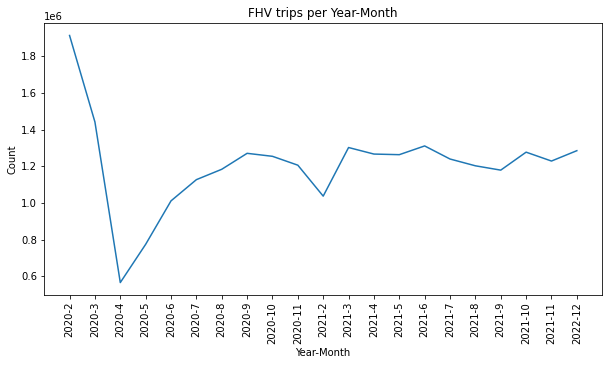

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_totals_pd['year'].astype(str) + '-' + monthly_totals_pd['month'].astype(str), monthly_totals_pd['Val'])
plt.title('FHV trips per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()
plt.close()

In [13]:
#importing libraries
from pyspark.sql.functions import lit
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import math
import time
import pyspark.sql.functions as F
from pyspark.sql.functions import concat
from pyspark.sql.functions import count,asc
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/miniconda3/share/proj failed


NOTE: Download Taxi_zones.shx, Taxi_zones.shp,Taxi_zones.prj,Taxi_zones.dbf files into your local repository from /shared/TAXI/ folder or obtain the shapefile data from https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc

In [14]:
#reading taxi zones shape files:
tzdata = gpd.read_file("Taxi_zones.shp")
tzdata.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [15]:
fhv_df.createOrReplaceTempView("fhv_updated")

In [16]:
pickup = spark.sql("SELECT PUlocationID, count(*) as Num FROM fhv_updated GROUP BY PUlocationID ORDER BY Num DESC")

In [17]:
pickup.show(5)

+------------+--------+
|PUlocationID|     Num|
+------------+--------+
|       264.0|23757364|
|        null|16685960|
|       265.0|  507933|
|       132.0|  470451|
|       161.0|  403006|
+------------+--------+
only showing top 5 rows



In [18]:
unique_loc_id = pd.unique(tzdata['location_i'])
print(len(unique_loc_id))
print(unique_loc_id)

260
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  24.  10.  11.  12.  13.
  18.  25.  14.  15.  22.  23.  16.  17.  19.  20.  21.  26.  27.  28.
  33.  29.  31.  32.  30.  34.  35.  36.  37.  38.  39.  40.  41.  45.
  46.  42.  43.  44.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  58.  59.  60.  61.  62.  63.  64.  65.  72.  66.  67.  68.  73.  69.
  70.  71.  79.  80.  74.  85.  86.  75.  76.  77.  78.  81.  87.  82.
  83.  84.  88.  89.  90. 125.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 149. 150. 121. 122. 123. 124. 126. 127.
 128. 129. 134. 151. 130. 139. 131. 132. 133. 140. 135. 136. 137. 141.
 142. 152. 138. 143. 144. 145. 146. 147. 148. 153. 154. 155. 156. 159.
 157. 158. 160. 161. 162. 163. 164. 170. 165. 166. 167. 178. 168. 169.
 171. 172. 173. 174. 175. 179. 176. 177. 180. 181. 182. 183. 184. 185.
 186. 189. 190. 187. 188. 191. 192. 193. 194. 196. 195. 203. 197. 198.
 1

# Plotting pickup frequency in different taxi zones

In [19]:
pu_count_pd = pickup.toPandas()
pu_count_pd['PUlocationID'] = pu_count_pd['PUlocationID'].fillna(0)
tzdata = tzdata.merge(pu_count_pd, left_on='location_i', right_on='PUlocationID',how='left')


In [20]:
tzdata = tzdata.rename(columns={'Num': 'pu_count'}).drop('PUlocationID', axis=1)
tzdata['pu_count'] = tzdata['pu_count'].fillna(0)
tzdata.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  \
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   

   pu_count  
0   29254.0  
1     106.0  
2   53573.0  
3  106959.0  
4   13713.0

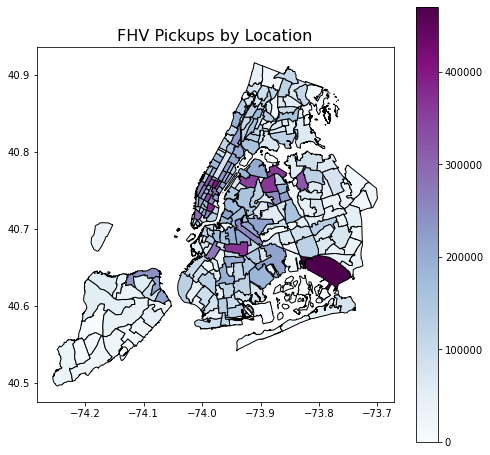

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
cmap = tzdata.plot(column='pu_count', cmap='BuPu', legend=True, ax=ax, edgecolor='black')
cmap.set_title("FHV Pickups by Location", fontsize = 16)
plt.show()
plt.close()

# Plotting dropoff frequency in different taxi zones

In [33]:
dropoff = spark.sql("SELECT DOlocationID, count(*) as Num FROM fhv_updated GROUP BY DOlocationID ORDER BY Num DESC")
dropoff.show(5)

+------------+--------+
|DOlocationID|     Num|
+------------+--------+
|       265.0|11626362|
|       264.0| 5387931|
|        null| 3384873|
|        76.0|  868922|
|        61.0|  724371|
+------------+--------+
only showing top 5 rows



In [34]:
do_count_pd = dropoff.toPandas()
do_count_pd['DOlocationID'] = do_count_pd['DOlocationID'].fillna(0)
tzdata = tzdata.merge(do_count_pd, left_on='location_i', right_on='DOlocationID',how='left')
tzdata = tzdata.rename(columns={'Num': 'do_count'}).drop('DOlocationID', axis=1)
tzdata['do_count'] = tzdata['do_count'].fillna(0)
tzdata.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  \
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   

   pu_count  do_count  
0   29254.0    199359  
1     106.0       470  
2   53573.0    225305  
3  106959.0    120859  
4   13713.0     14061

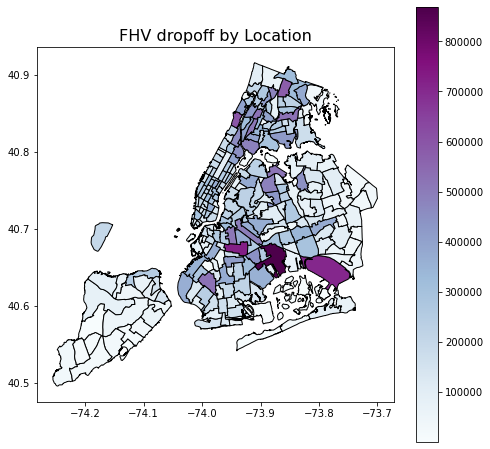

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
cmap = tzdata.plot(column='do_count', cmap='BuPu', legend=True, ax=ax, edgecolor='black')
cmap.set_title("FHV dropoff by Location", fontsize = 16)
plt.show()
plt.close()